# Improving Music selection Process using Machine Learning

## Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets, linear_model, metrics 
from matplotlib import pyplot as plt
from itertools import product
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import os

In [2]:
spotify = pd.read_csv("/Users/gopalika14/Desktop/SpotifyFeatures.csv")

In [3]:
spotify.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,230253.000000,230253.000000,230253.000000,2.302530e+05,230253.000000,230253.000000,230253.000000,230253.000000,230253.000000,230253.000000,230253.000000
mean,28.432754,0.351518,0.564311,2.316324e+05,0.585538,0.194058,0.217626,-9.778812,0.128680,117.386181,0.479569
std,20.878794,0.358003,0.183758,1.275258e+05,0.267678,0.336995,0.201097,5.981815,0.194037,30.992018,0.264221
min,0.000000,0.000000,0.000000,1.300000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,9.000000,0.024600,0.449000,1.786260e+05,0.397000,0.000000,0.096500,-12.168000,0.037000,93.015000,0.261000
50%,28.000000,0.195000,0.580000,2.177200e+05,0.629000,0.000148,0.130000,-8.040000,0.051200,115.316000,0.478000
75%,47.000000,0.705000,0.700000,2.623200e+05,0.810000,0.211000,0.273000,-5.624000,0.114000,137.927000,0.692000
max,100.000000,0.996000,0.995000,5.944212e+06,1.000000,1.000000,1.000000,3.744000,0.967000,242.981000,1.000000


## Exploratory Data Analysis

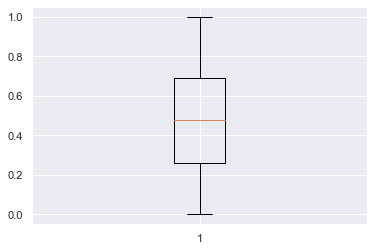

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns #visualisation
%matplotlib inline 
sns.set(color_codes=True)
y = spotify.valence
plt.boxplot(y) 
plt.show() 

In [5]:
import scipy.stats as st
y = spotify.valence
z = spotify.energy
st.pearsonr(y,z)

(0.3978331028144822, 0.0)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.159958,-0.076746,0.035274,0.145035,-0.174625,-0.055122,0.212624,-0.139175,0.059003,-0.105847
acousticness,-0.159958,1.000000,-0.346629,0.006667,-0.703686,0.235518,0.088272,-0.658903,0.168291,-0.225484,-0.316222
danceability,-0.076746,-0.346629,1.000000,-0.104656,0.289059,-0.216168,-0.053374,0.360577,0.129983,-0.000196,0.563898
duration_ms,0.035274,0.006667,-0.104656,1.000000,-0.026036,0.035586,0.011864,-0.038506,-0.027362,-0.012926,-0.134228
energy,0.145035,-0.703686,0.289059,-0.026036,1.000000,-0.336465,0.190735,0.814878,0.135146,0.205640,0.397833
instrumentalness,-0.174625,0.235518,-0.216168,0.035586,-0.336465,1.000000,-0.164418,-0.440605,-0.203533,-0.045387,-0.229788
liveness,-0.055122,0.088272,-0.053374,0.011864,0.190735,-0.164418,1.000000,0.056695,0.513691,-0.057959,-0.001875
loudness,0.212624,-0.658903,0.360577,-0.038506,0.814878,-0.440605,0.056695,1.000000,-0.007464,0.199573,0.363606
speechiness,-0.139175,0.168291,0.129983,-0.027362,0.135146,-0.203533,0.513691,-0.007464,1.000000,-0.104802,0.028936
tempo,0.059003,-0.225484,-0.000196,-0.012926,0.205640,-0.045387,-0.057959,0.199573,-0.104802,1.000000,0.118738


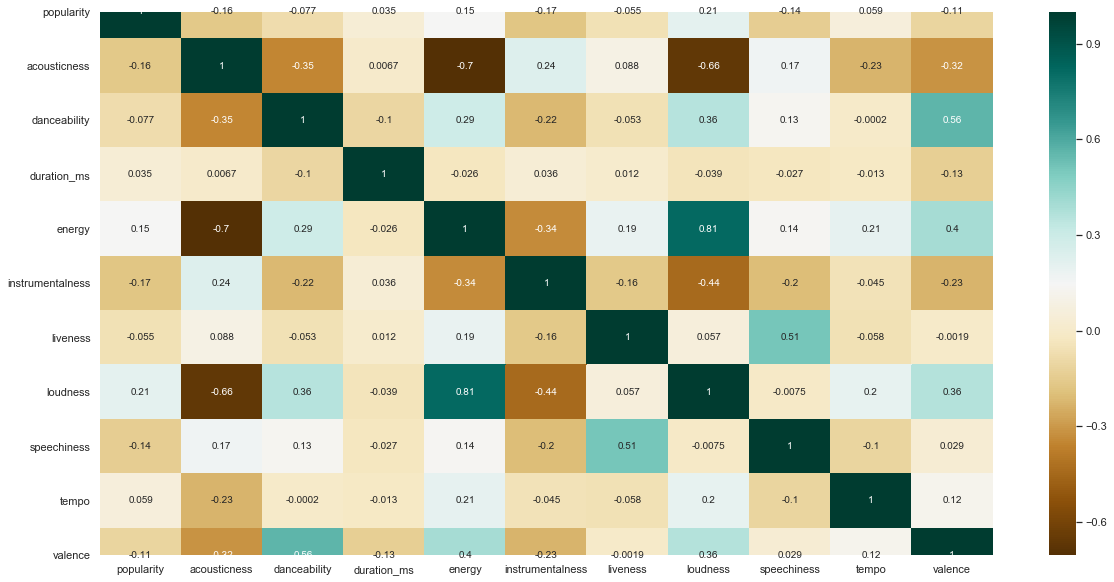

In [6]:
import seaborn as sns #visualisation
%matplotlib inline 
plt.figure(figsize=(20,10))
c= spotify.corr()
sns.heatmap(c, cmap = "BrBG", annot=True)
c

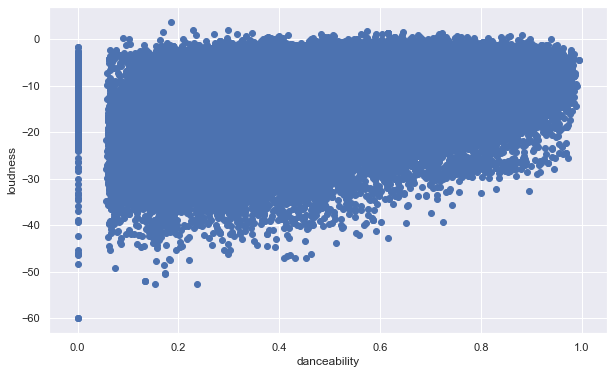

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(spotify ['danceability'], spotify ['loudness'])
ax.set_xlabel('danceability')
ax.set_ylabel('loudness')
plt.show()

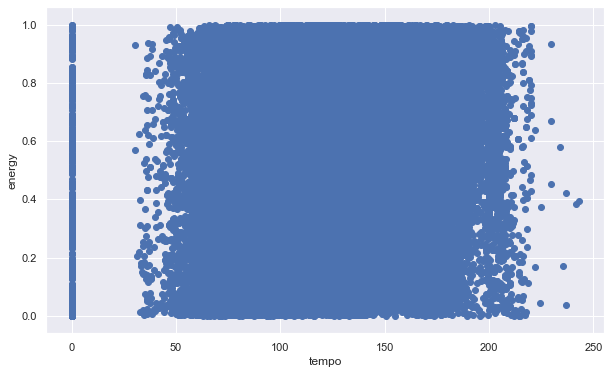

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(spotify ['tempo'], spotify ['energy'])
ax.set_xlabel('tempo')
ax.set_ylabel('energy')
plt.show()

## Modelling (Linear regression)

In [9]:
import os 
import pandas as pd
import numpy as np 
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [10]:
spotify.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [11]:
spotify['mood'] = np.where(spotify['valence']>= 0.5, 1,0)

In [12]:
spotify.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood
0,A Capella,Chase Goehring,A Capella,5Y1gZ4zoQBwmzu1KXXlTBM,52,0.164,0.636,303263,0.6810,0.000001,F#,0.167,-6.339,Minor,0.0840,121.933,4/4,0.3080,0
1,A Capella,Whitesnake,Slow An' Easy - A Capella Excerpts Remix,1mvZX4AkwtJ8BSkxezEdZB,0,0.754,0.664,77255,0.3670,0.000000,G,0.893,-10.671,Major,0.4060,106.107,4/4,0.5080,1
2,A Capella,Wolfgang Amadeus Mozart,"6 German Dances, K. 600: Dance No. 2 in F Major",1CjmFOfMlocFs7SkY849wI,0,0.813,0.567,127413,0.0495,0.444000,F,0.194,-18.120,Major,0.0527,115.338,3/4,0.5420,1
3,A Capella,Wolfgang Amadeus Mozart,"6 Minuets, K. 599: No. 4 in B-Flat Major",3t3CqBkbTgFvDUqNCEjqJM,0,0.245,0.324,167000,0.0588,0.959000,F,0.128,-20.028,Major,0.0434,121.964,3/4,0.3460,0
4,A Capella,Wolfgang Amadeus Mozart,"4 German Dances, K. 602: Dance No. 3 in C Major",4SgjZTdUzeRh7GFvYSyPdf,0,0.558,0.756,114413,0.0683,0.874000,C,0.150,-14.742,Major,0.0431,130.648,3/4,0.0392,0


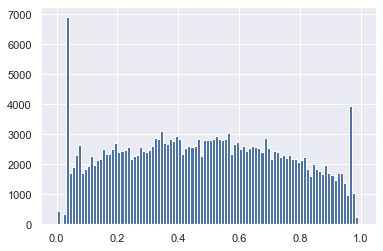

In [13]:
spotify['valence'].hist(bins=100)

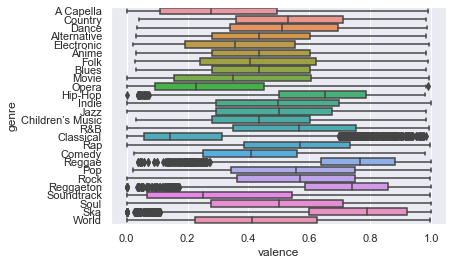

In [14]:
ax = sns.boxplot(x=spotify['valence'], y=spotify['genre'], data=spotify)
#ax = sns.boxplot(data = spotify ,orient="h")

In [15]:
#ax1 = sns.boxplot(x=spotify['popularity'], y=spotify['genre'], data=spotify)

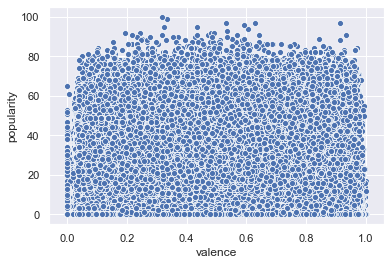

In [16]:
ax1 = sns.scatterplot(x=spotify['valence'], y=spotify['popularity'], data=spotify)

In [17]:
le = preprocessing.LabelEncoder()
spotify['key'] = le.fit_transform(spotify['key'])
#spotify['track_id'] = le.fit_transform(spotify['track_id'])
spotify['mode'] =  le.fit_transform(spotify['mode'])
spotify['genre'] = le.fit_transform(spotify['genre'])

In [18]:
# columns to not include in feature data; include song info
feat_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
             'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','key','mode','genre']
X, y = spotify[feat_cols], spotify['valence']

In [19]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.80, 
                                                random_state=42, shuffle=True)

In [20]:
lin_model = LinearRegression()
lin_model.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# coefficients
pd.DataFrame(lin_model.coef_.reshape(len(lin_model.coef_),1), trainX.columns, 
             columns=['Coefficient'])

,Coefficient
popularity,-1.242592e-03
acousticness,9.365591e-02
danceability,7.223976e-01
duration_ms,-1.377459e-07
energy,4.203449e-01
instrumentalness,-8.389483e-02
liveness,-6.073388e-03
loudness,-5.574321e-03
speechiness,-1.865564e-01
tempo,5.835774e-04


In [22]:
train_preds = lin_model.predict(trainX)
test_preds = lin_model.predict(testX)

print('Training MSE: ', metrics.mean_squared_error(trainY, train_preds))
print('Testing MSE: ', metrics.mean_squared_error(testY, test_preds))

Training MSE:  0.04002971181623174
Testing MSE:  0.04017120379277003


In [23]:
trainY.head()

193903    0.752
224174    0.445
6207      0.365
25953     0.441
79550     0.471
Name: valence, dtype: float64

In [24]:
from sklearn.tree import DecisionTreeRegressor    

#sort_idx = trainX.argsort()                  # Sort X and y by ascending values of X
#trainX = trainX[sort_idx]
#trainy = trainy[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
tree.fit(trainX, trainY)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
y_pred = tree.predict(testX)

In [26]:
metrics.mean_squared_error(testY, y_pred)

0.04557804951243695

Building Models- Logistic, Naive Bayes, Decision Tress, Random Forest and maybe NN

In [27]:
feat_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
             'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','key','mode','genre']
X, y = spotify[feat_cols], spotify['mood']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, 
                                                random_state=42, shuffle=True)

In [29]:
logr= LogisticRegression()
logr.fit(X_train,y_train)
prediction = logr.predict(X_test)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[16535  7711]
 [ 8880 12925]]


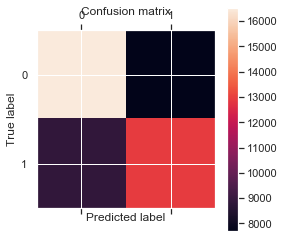

In [30]:
cm = confusion_matrix(y_test, prediction)

print(cm)



plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

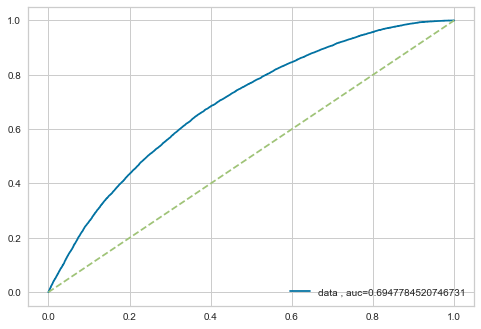

In [57]:
y_pred_proba = logr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  16535
False Positives:  7711
False Negatives:  8880
True Positives:  12925


In [32]:
Accuracy = (((tn+tp)) / (tp+tn+fp+fn) ) 
print(Accuracy)

from sklearn.metrics import classification_report
print (classification_report(y_test, prediction))

0.6397255217041975
              precision    recall  f1-score   support

           0       0.65      0.68      0.67     24246
           1       0.63      0.59      0.61     21805

    accuracy                           0.64     46051
   macro avg       0.64      0.64      0.64     46051
weighted avg       0.64      0.64      0.64     46051



Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
predict_NB = model.predict(X_test)
predict_NB_tr = model.predict(X_train)

In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(predict_NB, y_test ))
print(1- accuracy_score(predict_NB, y_test))

0.6293457253914139
0.37065427460858613


[[12122 12124]
 [ 4945 16860]]


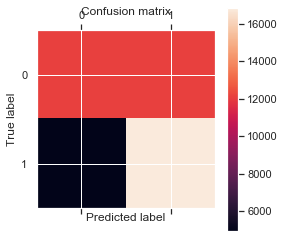

In [36]:
cm = confusion_matrix(y_test, predict_NB)

print(cm)



plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

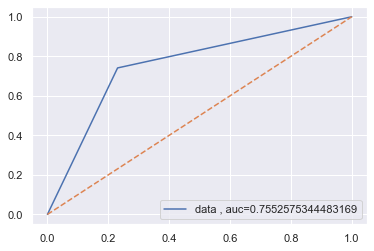

In [45]:
y_pred_proba_nb = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_nb)
auc_nb = metrics.roc_auc_score(y_test, y_pred_proba_nb)
plt.plot(fpr,tpr,label="data , auc="+str(auc_nb))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
def CrossValid(X,y,k,model):
    scores = []
    cv = KFold(n_splits = k , shuffle=True)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        scores.append((1 - accuracy_score(y_test, pred)))
    return (np.mean(scores))   

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_cv = np.array(X)
y_cv = np.array(y)
y_cv = np.ravel(y_cv)
kfolds = [5,10]
linda = LinearDiscriminantAnalysis()
log = LogisticRegression(solver = 'lbfgs')
for k in kfolds:
    print("%s- k-fold Cross validation error score for LDA: %s" %(k,CrossValid(X_cv,y_cv,k,linda)))
    print("%s- k-fold Cross validation error score for Logistic Regression: %s" %(k,CrossValid(X_cv,y_cv,k,log)))

5- k-fold Cross validation error score for LDA: 0.2713059206345153
5- k-fold Cross validation error score for Logistic Regression: 0.4738613485954568
10- k-fold Cross validation error score for LDA: 0.27140146949966304
10- k-fold Cross validation error score for Logistic Regression: 0.47386137108096565


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

pred_desctree = dt.predict(X_test)

In [41]:
print(accuracy_score(pred_desctree, y_test ))
print(1- accuracy_score(pred_desctree, y_test))

0.7550324640072963
0.2449675359927037


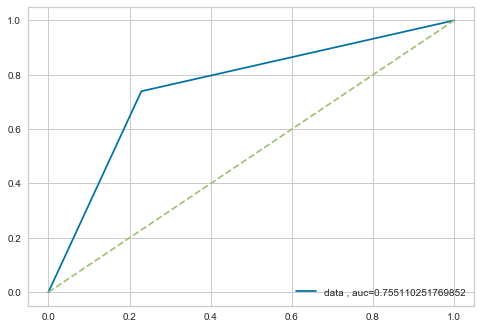

In [58]:
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [42]:
#Adaboost Classifier

# test dataset
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
n_estimators = [50,100,200]
for n in n_estimators:
    abc =AdaBoostClassifier(n_estimators=n, base_estimator=dt,learning_rate=1)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_t = model.predict(X_train)
    print("Accuracy for n = %s is %s "%(n,metrics.accuracy_score(y_test, y_pred)))
   # print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print ("Error for n = %s is %s"%(n,(1-metrics.accuracy_score(y_test, y_pred))))
    print("Precision for n = %s is %s "%(n,metrics.precision_score(y_test, y_pred)))
    print("Recall for n = %s is %s "%(n,metrics.recall_score(y_test, y_pred)))
    #print (classification_report(y_test, y_pred))

Accuracy for n = 50 is 0.7559662113743458 
Error for n = 50 is 0.24403378862565417
Precision for n = 50 is 0.7428860387073047 
Recall for n = 50 is 0.7411144232974088 
Accuracy for n = 100 is 0.7562702221450132 
Error for n = 100 is 0.24372977785498684
Precision for n = 100 is 0.7431854746035395 
Recall for n = 100 is 0.7414813116257739 
Accuracy for n = 200 is 0.7560096414844412 
Error for n = 200 is 0.24399035851555884
Precision for n = 200 is 0.7429766885833832 
Recall for n = 200 is 0.7410685622563632 


In [44]:
# testing dataset

from sklearn.ensemble import RandomForestClassifier
n_estimators = [50,100,150]
for n in n_estimators:
    classifier = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    y_pred_tr = classifier.predict(X_train)
    print("Accuracy for n = %s is %s "%(n,metrics.accuracy_score(y_test, pred)))
    print ("Error for n = %s is %s"%(n,(1-metrics.accuracy_score(y_test, pred))))
    print("Precision for n = %s is %s "%(n,metrics.precision_score(y_test, pred)))
    print("Recall for n = %s is %s "%(n,metrics.recall_score(y_test, pred)))

Accuracy for n = 50 is 0.8259104036828734 
Error for n = 50 is 0.17408959631712662
Precision for n = 50 is 0.8050982474774296 
Recall for n = 50 is 0.8343040587021325 
Accuracy for n = 100 is 0.8283859199583071 
Error for n = 100 is 0.17161408004169287
Precision for n = 100 is 0.8045211600806098 
Recall for n = 100 is 0.8421921577619812 
Accuracy for n = 150 is 0.828711645784022 
Error for n = 150 is 0.171288354215978
Precision for n = 150 is 0.8037982973149967 
Recall for n = 150 is 0.8443476266911258 


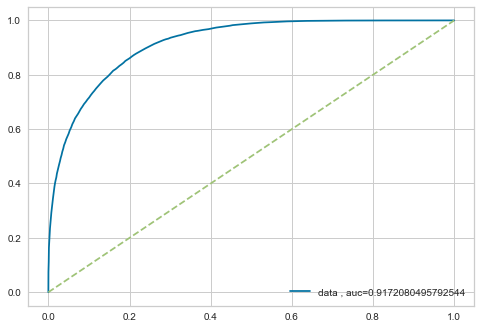

In [59]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.plot([0,1],[0,1],linestyle = '--')
plt.legend(loc=4)
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))


R^2 Training Score: 0.93 
OOB Score: 0.50 
R^2 Validation Score: 0.51


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_test, y_test)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_test, y_test), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X, y)))



R^2 Training Score: 0.92 
OOB Score: 0.41 
R^2 Validation Score: 0.51


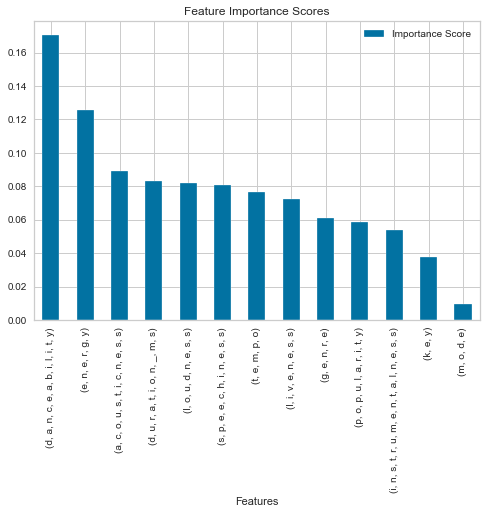

In [56]:
feature_scores = classifier.feature_importances_

features_df = pd.DataFrame({'Features': X_train, 'Importance Score': feature_scores})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.plot(x='Features',y='Importance Score',kind='bar')
plt.title('Feature Importance Scores')
plt.show()

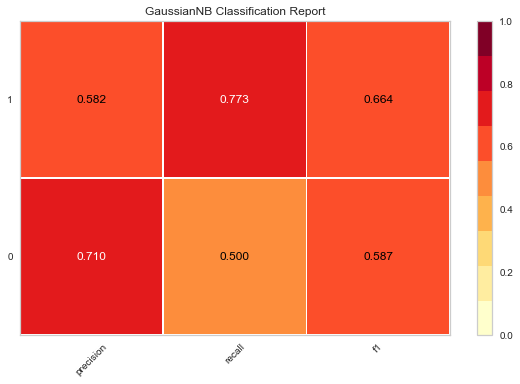

In [46]:
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
classes=['0','1']
visualizer=ClassificationReport(bayes,classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


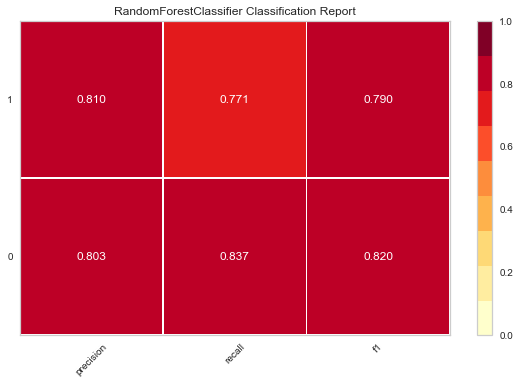

In [47]:
import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
classes=['0','1']
visualizer=ClassificationReport(rf,classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

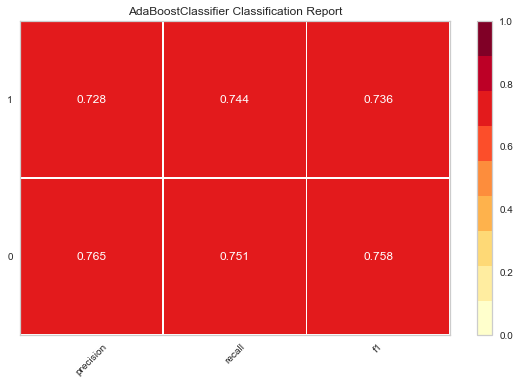

In [48]:

import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
classes=['0','1']
visualizer=ClassificationReport(adb,classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

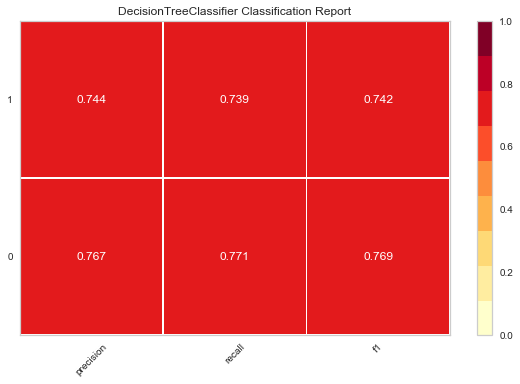

In [49]:

import yellowbrick
from yellowbrick.classifier import ClassificationReport
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
classes=['0','1']
visualizer=ClassificationReport(dt,classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [51]:
feat_cols = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
             'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','key','mode','genre']
X, y = spotify[feat_cols], spotify['mood']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, 
                                                random_state=42, shuffle=True)

In [ ]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_test, 
                                                        y_test,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()